# Ayiti Analytics Data Processing Bootcamp
Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


## Context
We were asked by Ayiti analytics to find 3 communes were they can most likely extend their training centers in the country besides Port-au-Prince. We were giving a dataset from their  bootcamp application forms to draw insights for the executive boards so they can make decisions for the future. We used Python to process the dataset with library like pandas,numpy and seaborn.

### I. DATA WRANGLING <a name="wrangle"></a>

### A.- Data Loading 


In [2]:
# First, we start by importing the library we will need for manipulating the data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date 


In [3]:
# Here, we are loading the dataset in our environement
enroll = pd.read_csv("enroll.csv")
industry = pd.read_csv("industry.csv")
order = pd.read_csv("ord.csv")
quest =  pd.read_csv("quest.csv")
study_domain  = pd.read_csv("study_domain.csv")
technology =  pd.read_csv("technology.csv")
transaction =  pd.read_csv("transaction.csv")
Geo  = pd.read_excel('commune.xlsx', sheet_name= 0)

In [4]:
enroll.head()

,Unnamed: 0,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN
1,1,2020-12-13T14:41:17.720Z,NaN,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-13T14:41:17.720Z,NaN
2,2,2020-12-15T00:53:06.499Z,NaN,31987560,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-15T00:53:06.499Z,NaN
3,3,2020-12-18T18:38:55.683Z,NaN,35616451,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-18T18:38:55.683Z,NaN
4,4,2020-12-21T14:45:06.528Z,NaN,35390649,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-21T14:45:06.528Z,NaN


### B.- Data Processing 

### 1 - Merging The Questionnaire Dataset and the Commune dataset 
 This merging will allow us to identify the location of all the applicants.Before we process with the merging,we will do data manipulations on the values of the Departement and commune columns in the dataset

In [5]:
# Before the merging, we clean the created_at columns to make better process of the data 
#This code will turn all the values in the columns in string
quest['department'] = quest['department'].apply(lambda x  : str(x))
#This code will transform all the strings in uppercase. The goal is to match the value in the quest dataset with commune dataset 
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())


In [6]:
#Here we can process with the merging
table1 = pd.merge(quest,Geo, how = 'left',left_on =['department','commune'],right_on = ['ADM1_PCODE','Commune_Id'])
table1.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01


### 2- Processing Date 

In [7]:
#We will get rid of the timestamp in the values of the column created_at dataset
y = pd.DataFrame(table1.created_at.str.split('T',1).tolist(),columns = ['Date_created_at','To_drop'])
table1['created_at'] = y.iloc[:,0]
table1['created_at'].head()

0    2021-02-14
1    2021-02-16
2    2021-02-16
3    2021-02-16
4    2021-02-16
Name: created_at, dtype: object

### 3- Merging Ord and transaction dataset
 Here, We will work with the Transaction and Ord dataset in order to identify the Payment method of each bootcamp applicants. The merging process will filter the user enrolled in the course that do not applied for the bootcamp  

In [8]:
#We start our data merging with the enroll and transaction dataset
table3=pd.merge(enroll,transaction, how = 'right',left_on =['user_id'],right_on = ['user_id'] )
# We do the same process with the enroll and ord dataset
table4 =pd.merge(enroll,order, how = 'right',left_on =['user_id'],right_on = ['user_id'] )
#We create a new column with categorical variable on each table to specify the name of the payment
table3['Payment Method'] = 'Moncash'
table4['Payment Method'] = 'Credit Card/Paypal'


In [9]:
# Here we did and slicing and data cleaning 
x = table4.loc[:,['Payment Method','quest_id_y','percentage_completed']]
y = table3.loc[:,['Payment Method','quest_id','percentage_completed']]
x=x.rename(columns = {'quest_id_y': 'quest_id'})
#Let's concatenate the dataframe  
z = pd.concat([x,y],axis = 0)
display(z.head(20))

,Payment Method,quest_id,percentage_completed
0,Credit Card/Paypal,906b3c86-ce95-11eb-b6a7-7c67a234f601,0.325581
1,Credit Card/Paypal,906636cf-ce95-11eb-8679-7c67a234f601,0.023256
2,Credit Card/Paypal,906968f5-ce95-11eb-9e1a-7c67a234f601,0.604651
3,Credit Card/Paypal,9060477c-ce95-11eb-ace3-7c67a234f601,0.209302
4,Credit Card/Paypal,9064ff29-ce95-11eb-a3d3-7c67a234f601,0.023256
5,Credit Card/Paypal,9065740c-ce95-11eb-968f-7c67a234f601,0.023810
6,Credit Card/Paypal,906a52b7-ce95-11eb-9c4b-7c67a234f601,0.395349
7,Credit Card/Paypal,90617f12-ce95-11eb-a3c8-7c67a234f601,0.285714
8,Credit Card/Paypal,NaN,NaN
9,Credit Card/Paypal,9061312a-ce95-11eb-ba28-7c67a234f601,0.302326



We will update our main dataset with the payment method. We will list all the applicants who paid setting aside those who paid but did not applied for the bootcamp

### 4- Final Merging 

In [10]:
final = pd.merge(table1,z,how = 'left', left_on = 'quest_id', right_on= 'quest_id')
final.reset_index(inplace = True ,level = 0)
final['Payment Method'] = final['Payment Method'].fillna('No Payment')
final =final.loc[:,['gender','dob','commune','created_at','department','education_level','university','current_employed','formal_sector_job','have_computer_home','internet_at_home','hear_AA_1','after_AA','quest_id','Commune_en','Commune_Id','Departement','Payment Method','percentage_completed']]
final = final.set_index('quest_id')



In [11]:
print('Here we are displaying the head of our final dataframe \n')
display(final.head())


Here we are displaying the head of our final dataframe 



,gender,dob,commune,created_at,department,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,Commune_en,Commune_Id,Departement,Payment Method,percentage_completed
quest_id,,,,,,,,,,,,,,,,,,
905dc006-ce95-11eb-b2f9-7c67a234f601,male,25/08/1998,HT0111,2021-02-14,NAN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,NaN,NaN,No Payment,NaN
905ddcf2-ce95-11eb-9a92-7c67a234f601,female,29/09/1996,HT0111,2021-02-16,HT01,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Friend,Finding a job/internship,Port-au-Prince,HT0111,West,No Payment,NaN
905e2608-ce95-11eb-809f-7c67a234f601,male,17/05/1996,HT0111,2021-02-16,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),No,unknown,Yes,Yes,Friend,Improving my data analysis skills,Port-au-Prince,HT0111,West,Moncash,0.325581
905e4cf5-ce95-11eb-96a9-7c67a234f601,male,24/11/1996,HT0111,2021-02-16,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,Port-au-Prince,HT0111,West,No Payment,NaN
905e73fd-ce95-11eb-a7b0-7c67a234f601,male,20/07/1997,HT0111,2021-02-16,HT01,High School (16 years),unknown,No,unknown,Yes,Yes,WhatsApp,Mentorship,Port-au-Prince,HT0111,West,No Payment,NaN


In [12]:

print('We are checking if our dataset has Na values  \n' )
display(final.isna().sum())


We are checking if our dataset has Na values  



gender                    0
dob                       6
commune                   0
created_at                0
department                0
education_level           0
university                0
current_employed          0
formal_sector_job         0
have_computer_home        0
internet_at_home          0
hear_AA_1                 0
after_AA                  0
Commune_en                2
Commune_Id                2
Departement               2
Payment Method            0
percentage_completed    185
dtype: int64

In [13]:
print('The column date of birth has 6 Na values   \n' )
display(final[final['dob'].isna()])
print('We will clean the missing values when wil be working on the dates columns')

The column date of birth has 6 Na values   



,gender,dob,commune,created_at,department,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,Commune_en,Commune_Id,Departement,Payment Method,percentage_completed
quest_id,,,,,,,,,,,,,,,,,,
9060e347-ce95-11eb-abbb-7c67a234f601,male,NaN,HT0111,2021-02-23,HT01,Other,unknown,No,unknown,Yes,Yes,WhatsApp,Training to start my own company,Port-au-Prince,HT0111,West,Moncash,0.790698
906241d5-ce95-11eb-9850-7c67a234f601,male,NaN,HT0111,2021-03-14,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),No,unknown,Yes,Yes,ESIH,other,Port-au-Prince,HT0111,West,Moncash,0.000000
9065822a-ce95-11eb-9df5-7c67a234f601,female,NaN,HT0112,2021-03-03,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),No,unknown,Yes,Yes,Friend,Improving my data analysis skills,Delmas,HT0112,West,No Payment,NaN
9066fab1-ce95-11eb-a4e2-7c67a234f601,female,NaN,HT0113,2021-02-18,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),No,unknown,Yes,Yes,Facebook,Finding a job/internship,Carrefour,HT0113,West,No Payment,NaN
90691afb-ce95-11eb-a4c3-7c67a234f601,male,NaN,HT0131,2021-02-16,HT01,Bachelors (bacc +4),Université INUKA,No,unknown,Yes,Yes,WhatsApp,Training to start my own company,Croix-Des-Bouquets,HT0131,West,Moncash,0.023256
906a04c9-ce95-11eb-8f6a-7c67a234f601,male,NaN,HT0443,2021-02-19,HT04,High School (16 years),unknown,unknown,unknown,Yes,Yes,LinkedIn,Improving my data analysis skills,Mombin Crochu,HT0443,North-East,No Payment,NaN


We will clean the missing values when wil be working on the dates columns


In [14]:
#Working on the Date and Age of all applicants
# We will work on the date of birth columns.
final['dob'].replace({'3 aout 1977':'03/08/1977'},inplace = True)
final['dob'] = pd.to_datetime(final['dob'])
final['created_at'] = pd.to_datetime(final['created_at'])
final['dob']

quest_id
905dc006-ce95-11eb-b2f9-7c67a234f601   1998-08-25
905ddcf2-ce95-11eb-9a92-7c67a234f601   1996-09-29
905e2608-ce95-11eb-809f-7c67a234f601   1996-05-17
905e4cf5-ce95-11eb-96a9-7c67a234f601   1996-11-24
905e73fd-ce95-11eb-a7b0-7c67a234f601   1997-07-20
                                          ...    
906b3c84-ce95-11eb-8c2a-7c67a234f601   1994-02-15
906b3c85-ce95-11eb-9b87-7c67a234f601   1990-08-10
906b3c86-ce95-11eb-b6a7-7c67a234f601   1993-12-28
906b65e2-ce95-11eb-8b5c-7c67a234f601   1992-04-17
906b65e3-ce95-11eb-a294-7c67a234f601   1993-07-22
Name: dob, Length: 250, dtype: datetime64[ns]


## 

In [15]:
#II - Setting up the Age columns and cleaning incorrect data.

#N.B : We replace incorrect data about age with the mean of the age  of the applicants



def Calculate_Age(born) :
    """
    This function will allow us to calcute the age of all the applicants by the end of the application process
    """
    today = date(2021,6,18)
    return today.year - born.year - ((today.month,today.day)< (born.month,born.day))

final['Age'] = final['dob'].apply(Calculate_Age)
final['Age'] = final['Age'].fillna(final['Age'].mean())
#we find incorrect input in dataset. we replace with mean of the age of the applicants
final['Age'].replace({(1,0,-1):final['Age'].mean()},inplace = True)
final['Age'] = final['Age'].apply(lambda x : int(x))
move = final.pop('Age')
final.insert(2,'Age',move)
final=final.rename(columns = {' Date_of_registration': 'Date'})
final.columns

Index(['gender', 'dob', 'Age', 'commune', 'created_at', 'department',
       'education_level', 'university', 'current_employed',
       'formal_sector_job', 'have_computer_home', 'internet_at_home',
       'hear_AA_1', 'after_AA', 'Commune_en', 'Commune_Id', 'Departement',
       'Payment Method', 'percentage_completed'],
      dtype='object')

### C - Exploratory Data Analysis





### Descriptive Analysis
In total form the dataset , we had 250 applications for the 2021 Bootcamp of which 203 males and 43 females with an average age of 27.6 years and 26.44 years respectively.  148 of the applicants were university students, 33 were high school students. The most represented communes were Delmas with 71 applicants, Port-Au-Prince with 57 applicants,Petion-ville with 29 students and Carrefour with 23 applicants. These communes were also on top for communes where the most percentage applicants have acces to internet and have a computer at home. 

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,47.0,26.446809,5.278375,21.0,23.0,26.0,27.5,45.0
male,203.0,27.699507,5.461236,19.0,24.0,26.0,30.0,50.0


<AxesSubplot:title={'center':'Average age of applicants by Gender'}, xlabel='gender', ylabel='Age'>

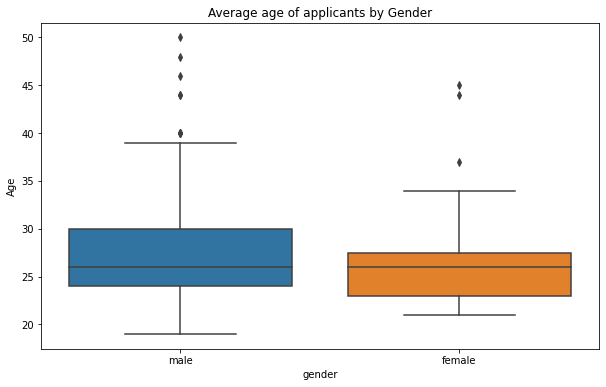

In [16]:
display(final['Age'].groupby(by= final['gender']).describe())
plt.figure(figsize=(10,6))
plt.title('Average age of applicants by Gender')
sns.boxplot(data=final,x="gender",y="Age")

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
Bachelors (bacc +4),148.0,27.959459,4.916830,21.0,25.0,26.0,30.00,46.0
"Doctorate (PhD, MD, JD)",1.0,31.000000,NaN,31.0,31.0,31.0,31.00,31.0
High School (16 years),33.0,23.181818,3.477198,19.0,21.0,23.0,24.00,38.0
Masters,14.0,34.000000,7.452413,24.0,29.0,33.0,34.75,50.0
Other,51.0,26.725490,4.733195,21.0,23.0,26.0,29.00,40.0
unknown,3.0,31.000000,11.532563,22.0,24.5,27.0,35.50,44.0


Text(0.5, 1.0, 'Boxplot of applicants by education level')

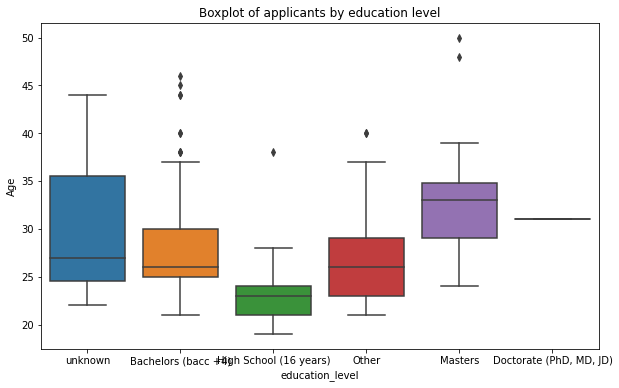

In [17]:
display(final['Age'].groupby(by= final['education_level']).describe())
plt.figure(figsize=(10,6))
sns.boxplot(data=final,x="education_level",y="Age")
plt.title('Boxplot of applicants by education level')


In [18]:

def generate_barchart(data=final, title ="",abs_value ="Total",rel_value="Percent",figsize =(15,8),ylabel="") :
    '''
    This function we define here will generate bar chart with more information on the data  
    '''
    plt.figure(figsize=figsize)
    axes = sns.barplot(data=data,x=data.index,y=abs_value)
    i=0
    for tot, perc in zip(data[abs_value],data[rel_value]):
        axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
        axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
          
    
        i+=1
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()


,Total,Percent
Delmas,71,0.286290
Port-au-Prince,57,0.229839
Petion-Ville,29,0.116935
Carrefour,23,0.092742


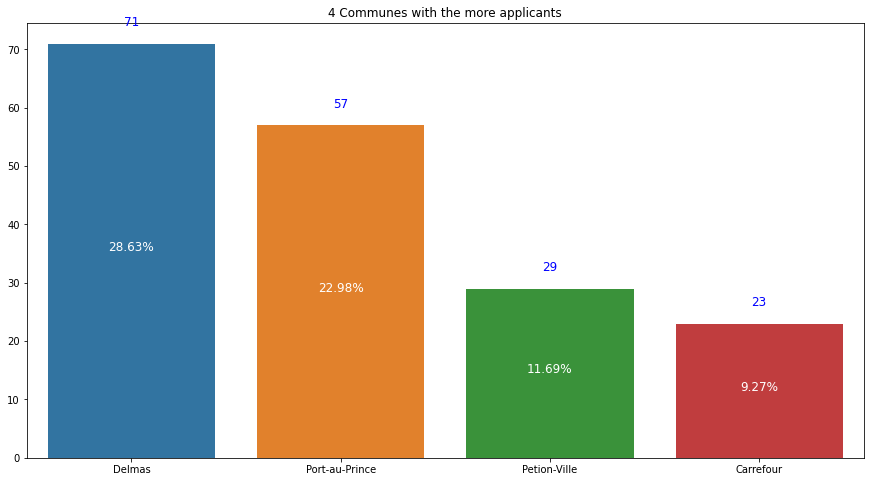

In [19]:
Com = final.Commune_en.value_counts().to_frame().iloc[:4,:]
Com.rename(columns={"Commune_en":"Total"},inplace=True)
Com1 = final.Commune_en.value_counts(normalize = True).to_frame().iloc[:4,:]
Com1.rename(columns={"Commune_en":"Percent"},inplace=True)
resul = pd.concat([Com,Com1],axis =1)

resul.reset_index()
display(resul)

generate_barchart(resul,title ="4 Communes with the more applicants", abs_value="Total",rel_value='Percent', ylabel='' )

In [20]:
payment_table = pd.pivot_table(final,'Age',index='Commune_en',columns=['Payment Method'],aggfunc = ['count'],fill_value=0)
payment_table = payment_table.sort_values(by= ('count','Moncash'),ascending = False).iloc[:5,:2]
payment_table

count        
Payment Method Credit Card/Paypal Moncash
Commune_en                               
Delmas                          5      17
Port-au-Prince                  5      13
Petion-Ville                    0       5
Tabarre                         0       4
Carrefour                       0       4

As the table shows it, Delmas, followed by Port-au-Prince had the most applicants that process with the next step of the applications


## How many applications must be made to select 25% women for each on average ?

In [21]:
gender_table = pd.pivot_table(final,'Age',index='Commune_en',columns=['gender'],aggfunc = ['count'],fill_value=0)
gender_table = gender_table.sort_values(by= ('count','female'),ascending = False)
gender_table['Total'] =gender_table[('count','female')] +gender_table[('count','male')]

gender_table['Percentage of female'] =gender_table[('count','female')]/(gender_table[('Total')])
t =gender_table.iloc[:4,:] 
t


count      Total Percentage of female
gender         female male                           
Commune_en                                           
Port-au-Prince     19   38    57             0.333333
Delmas             12   59    71             0.169014
Carrefour           6   17    23             0.260870
Petion-Ville        4   25    29             0.137931

In [22]:
#gender_table.iloc[:4,:] 


In [23]:
print('The number applications of women  to obtain 25 % on average should exceed :',np.round(t['expectation'].sum(),0), 'in the first 4 communes ')
display(t)

KeyError: 'expectation'

To obtain this result, our hypothesis was to obtain only females applications for the first 4 communes to be able to reach the target mean of 25 % on average. We find that the average of women by application was set at 22.5 %. Our goal was short to only 2.5% which represented at least 5 more  applications of women for the bootcamp to obtain 25% on average

In [189]:
education_table = pd.pivot_table(final,'Age',index='Commune_en',columns=['education_level'],aggfunc = ['count'],fill_value=0)
display(education_table.sort_values(by=('count','Bachelors (bacc +4)'),ascending = False).iloc[:4,[0,1,3]])


count                                
education_level Bachelors (bacc +4) Doctorate (PhD, MD, JD) Masters
Commune_en                                                         
Delmas                           41                       1       5
Port-au-Prince                   28                       0       4
Petion-Ville                     20                       0       1
Carrefour                        17                       0       1

## What is the average number of university students who should participate in this program

In [190]:
educa_level = pd.pivot_table(final,'Age',index='Commune_en',columns='education_level',aggfunc = ['count'],fill_value=0)
educa_level = educa_level.sort_values(by=('count','Bachelors (bacc +4)'),ascending = False)
educa_level=educa_level.iloc[:4,[0,1,3]]
educa_level['sum'] = educa_level.sum(axis = 1)
educa_level['total']= resul['Total']
educa_level['mean'] = educa_level['sum']/educa_level['total']
display(educa_level)


print('The average number of university student who should participate in one cohort should be around',np.round(educa_level['mean'].mean(),1)*30)

count                                 sum total  \
education_level Bachelors (bacc +4) Doctorate (PhD, MD, JD) Masters             
Commune_en                                                                      
Delmas                           41                       1       5  47    71   
Port-au-Prince                   28                       0       4  32    57   
Petion-Ville                     20                       0       1  21    29   
Carrefour                        17                       0       1  18    23   

                     mean  
education_level            
Commune_en                 
Delmas           0.661972  
Port-au-Prince   0.561404  
Petion-Ville     0.724138  
Carrefour        0.782609

The average number of university student who should participate in one cohort should be around 21.0


To get this result, we calculate the average of the mean of all the university levels applicant in each commune.Then we use the proportion to find the number of applicants in one cohort

,Total,Percent
internet_at_home,Yes,
Commune_en,,
Delmas,61,0.244
Port-au-Prince,51,0.204
Petion-Ville,25,0.100
Carrefour,18,0.072


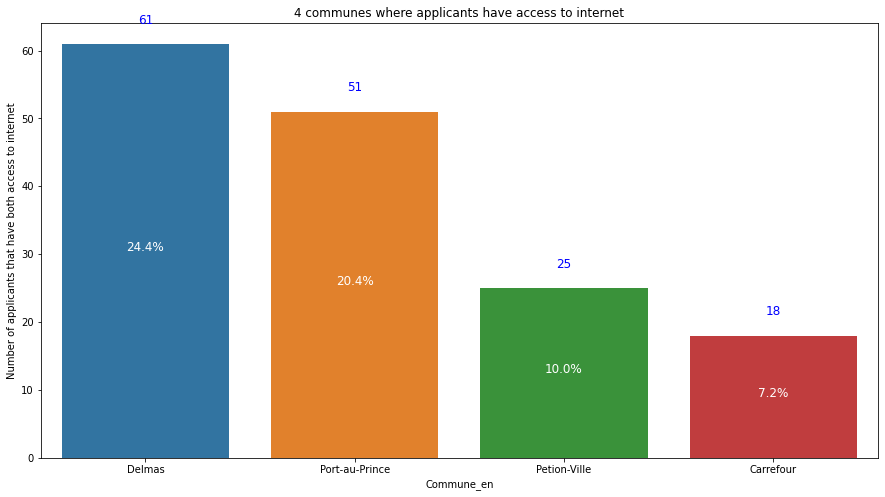

In [191]:
internet_access = pd.pivot_table(final,'Age',index='Commune_en',columns='internet_at_home',aggfunc = ['count'],fill_value=0)
internet_access = internet_access.sort_values(by=('count','Yes'),ascending = False)
internet_access = internet_access.iloc[:4,[1]]
internet_access['Percent']  = internet_access[('count','Yes')]/final.shape[0]
internet_access.rename(columns={"count":"Total"},inplace=True)
display(internet_access)
generate_barchart(internet_access,title = "4 communes where applicants have access to internet", abs_value = ('Total','Yes') , rel_value = 'Percent',ylabel='Number of applicants that have both access to internet')


This graph here shows the 3 communes beside Port-au-Prince that have a higher access to internet.Delmas has the higher percentage of applicants that have access to internet followed by Petion-ville and Carrefour.

,Total,Percent
have_computer_home,Yes,
Commune_en,,
Delmas,66,0.264
Port-au-Prince,56,0.224
Petion-Ville,25,0.100
Carrefour,21,0.084


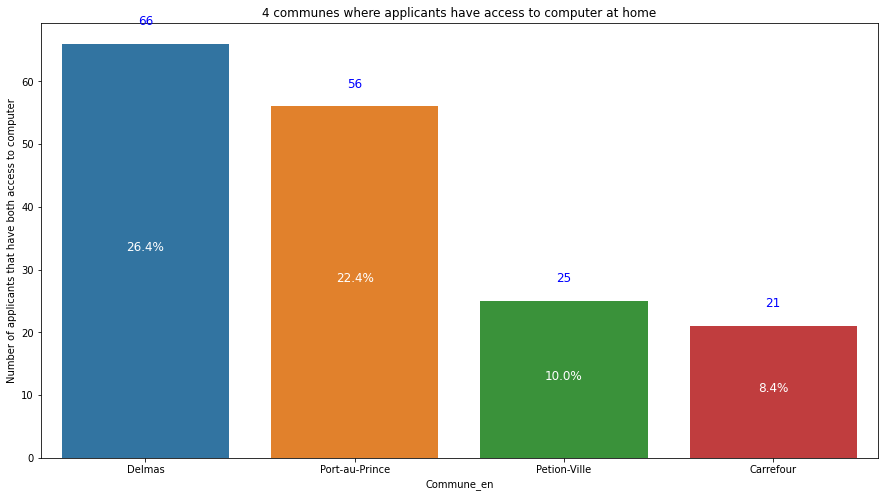

In [192]:
computer_access = pd.pivot_table(final,'Age',index='Commune_en',columns='have_computer_home',aggfunc = ['count'],fill_value=0)
computer_access = computer_access.sort_values(by=('count','Yes'),ascending = False)
computer_access = computer_access.iloc[:4,[1]]
computer_access
computer_access['Percent']  =computer_access[('count','Yes')]/final.shape[0]
computer_access.rename(columns={"count":"Total"},inplace=True)
display(computer_access)
generate_barchart(computer_access,title = "4 communes where applicants have access to computer at home", abs_value = ('Total','Yes') , rel_value = 'Percent',ylabel='Number of applicants that have both access to computer')

This graph here shows the 3 communes beside Port-au-Prince that have a higher access to computer at Home.Delmas has the higher percentage of applicants that have computer at home followed by Petion-ville and Carrefour

                   Total     Percent
internet_at_home     Yes            
have_computer_home    No Yes        
Commune_en                          
Delmas                 3  58   0.232
Port-au-Prince         0  51   0.204
Petion-Ville           4  21   0.084
Carrefour              1  17   0.068


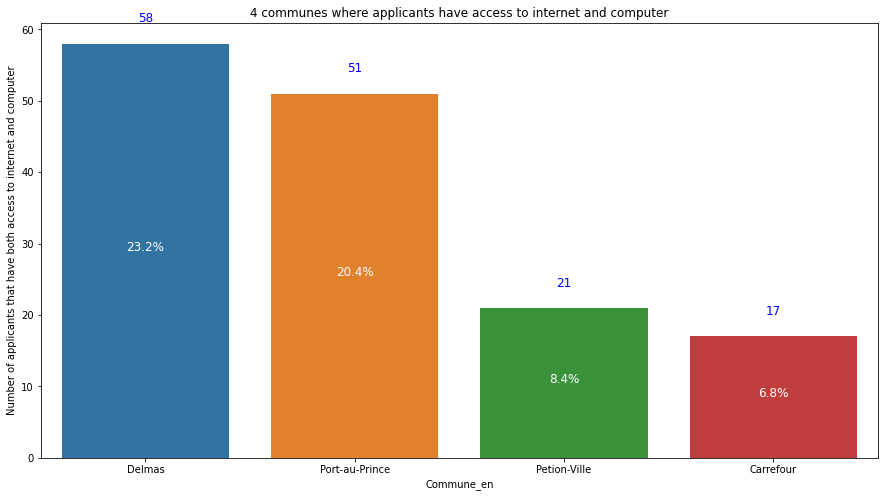

In [193]:
reg = pd.pivot_table(final,'Age',index='Commune_en',columns=['internet_at_home','have_computer_home'],aggfunc = ['count'],fill_value=0)
reg = reg.sort_values(by=('count','Yes','Yes'),ascending = False)
reg = reg.iloc[:4,[2,3]]
reg['Percent'] = reg[('count','Yes','Yes')]/final.shape[0]
reg.rename(columns={"count":"Total"},inplace=True)
print(reg)
generate_barchart(reg,title = "4 communes where applicants have access to internet and computer", abs_value = ('Total','Yes','Yes') , rel_value = 'Percent',ylabel='Number of applicants that have both access to internet and computer')



This graph here shows the 3 communes beside Port-au-Prince that have a higher access to computer at Home and internet at home.Delmas has the higher percentage of applicants that have computer at home followed by Petion-ville and Carrefour

In [194]:
#Let's start by creating a pivot table on the communication channels and gender columns 
result2 = pd.pivot_table(final,'Age',index =['hear_AA_1'] ,columns=['gender'],aggfunc=['count'],fill_value = 0)
#we are sorting the values from biggest to smallest and filter the 3 first
result2= result2.sort_values(by = ('count','male'),ascending = False)
result2 = result2.iloc[:4,:]
result2

count     
gender    female male
hear_AA_1            
WhatsApp       9   57
Friend        11   56
Facebook       6   34
LinkedIn       1   14

## What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection ?



count                                \
hear_AA_1          Ayiti Analytics Website Bootcamp Alumni ESIH Facebook   
Payment Method                                                             
Credit Card/Paypal                       0               1    0        2   
Moncash                                  3               7    4        7   

                                                                     
hear_AA_1          Friend Instagram LinkedIn WhatsApp other unknown  
Payment Method                                                       
Credit Card/Paypal      5         1        0        4     1       0  
Moncash                17         0        3        9     1       0

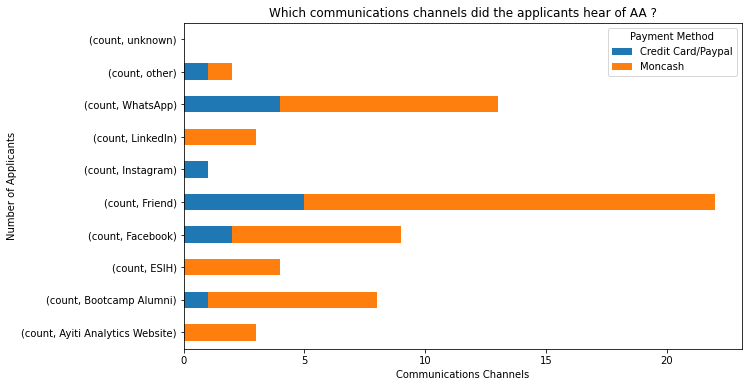

In [24]:
result2 = pd.pivot_table(final,'Age',index = ['Payment Method'],columns=['hear_AA_1'],aggfunc=['count'],dropna = True,fill_value = 0)

result2 = result2.iloc[:2,:]
display(result2)
ax = result2.sort_index().T.plot(kind='barh',figsize=(10,6),stacked = True)
ylab = ax.set_ylabel('Number of Applicants')
xlab = ax.set_xlabel('Communications Channels')
title = ax.set_title('Which communications channels did the applicants hear of AA ?')

## What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection ?

count                                  \
hear_AA_1          Ayiti Analytics Website Bootcamp Alumni   ESIH Facebook   
gender                              female          female female   female   
Payment Method                                                               
Credit Card/Paypal                       0               1      0        1   
Moncash                                  0               2      0        1   

                                                                      
hear_AA_1          Friend Instagram LinkedIn WhatsApp  other unknown  
gender             female    female   female   female female    male  
Payment Method                                                        
Credit Card/Paypal      1         0        0        2      0       0  
Moncash                 2         0        1        2      1       0

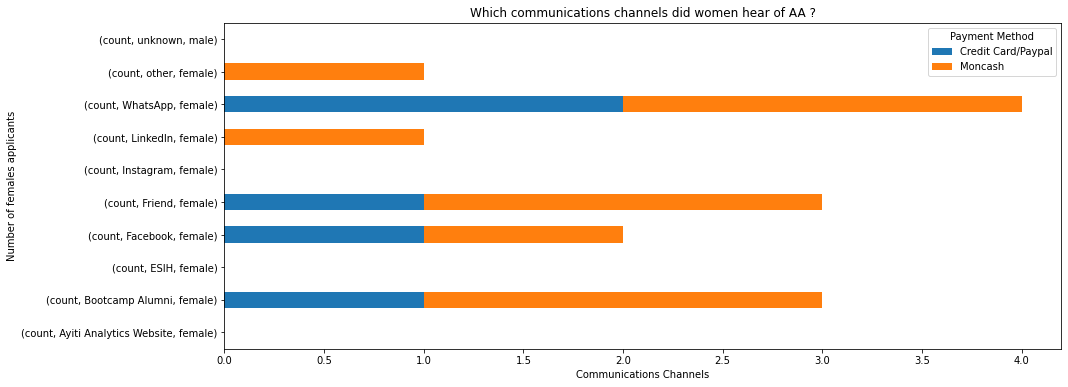

In [201]:
result3 = pd.pivot_table(final,'Age',index = ['Payment Method'],columns=['hear_AA_1','gender'],aggfunc=['count'],dropna = True,fill_value = 0)
result3 = result3.iloc[:2,[0,2,4,6,8,10,12,14,16,18]]
display(result3)

ax = result3.sort_index().T.plot(kind='barh',figsize=(15,6),stacked = True)
ylab = ax.set_ylabel('Number of females applicants')
xlab = ax.set_xlabel('Communications Channels')
title = ax.set_title('Which communications channels did women hear of AA ?')


## - What will be the average number of applications per week that we could have ?

In [198]:
final['date'] = ""
dg = final.groupby(pd.Grouper(key='created_at', freq='7D'))['date'].value_counts().to_frame()
dg['Number of weeks'] = ['Week 1','Week 2','Week 3','Week 4','Week 5']
dg = dg.set_index('Number of weeks')



The average number of applications per week should be  50.0


,date,mean
Number of weeks,,
Week 1,136,50.0
Week 2,54,50.0
Week 3,29,50.0
Week 4,29,50.0
Week 5,2,50.0


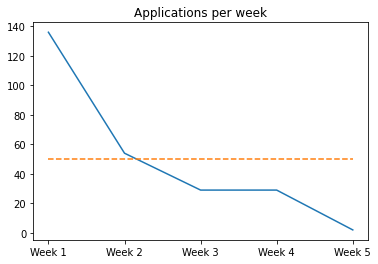

In [199]:
#Setting up the mean column in the table 
dg['mean'] = dg.date.mean()
print('The average number of applications per week should be ',dg['mean'][0])
display(dg)

#plotting  the table
plt.grid=True
plt.plot(dg.index,dg.date,label='Registration')
plt.plot(dg.index,dg['mean'],label='mean',linestyle = '--')
plt.title('Applications per week')
plt.show()



### Conclusion

After getting all of the insights through the dataset, The communes we have identified where Ayiti analytics could extend their training centers should be Delmas, Carrefour and Petion-ville. Theses communes have the higher access to internet and computer. 

They are also the top of communes with the more courses paid, applicants from these region shows a lot of interest and if Ayiti analytics where to made a only online bootcamp, theses communes should be on top but there as many factors as internet penetretations, electricity access that could undermine this project we will need more data to draw more insights about this question.

Ayiti analytics want to see more women engage in data science, we saw that the effective communications channels are Whatsapp, friends. Participating in a bootcamp can be challenging, Friends can be a great source of motivation as we saw mostly those who paid for the next steps hear from AA via a Friend or Social media.